<h1>Twitter Sentiment Analysis with Python</h1>

In [12]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv(r"tweet_data.csv")

In [14]:
df.sample(5)

,textID,tweet_text,sentiment
1036,1957485440,stuck in huge traffic jam,negative
17823,1753598814,Music Update Before Leaving. Check out the son...,positive
631,1957269942,@polyap POL! Is this song from a new album? I ...,negative
11939,1695107397,Watching 5 children and it. i really should b...,negative
12533,1695545348,Heading off to Hollywood Studios today Manta ...,positive


In [15]:
df.shape

(18727, 3)

In [16]:
df.isna().sum()

textID        0
tweet_text    0
sentiment     0
dtype: int64

In [17]:
df['sentiment'].value_counts()

positive    9897
negative    8830
Name: sentiment, dtype: int64

In [18]:
df.drop(columns = ['textID'],inplace=True)

In [19]:
df.head()

,tweet_text,sentiment
0,Layin n bed with a headache ughhhh...waitin o...,negative
1,Funeral ceremony...gloomy friday...,negative
2,wants to hang out with friends SOON!,positive
3,Re-pinging @ghostridah14: why didn't you go to...,negative
4,Hmmm. http://www.djhero.com/ is down,negative


#### Handle the RT Tag

A Retweet is a re-posting of a Tweet. Twitter's Retweet feature helps you and others quickly share that Tweet with all of your followers. You can Retweet your own Tweets or Tweets from someone else. Sometimes people type "RT" at the beginning of a Tweet to indicate that they are re-posting someone else's content.

In [20]:
def replace_retweet(tweet, default_replace=""):
    tweet = re.sub('RT\s+', default_replace, tweet)
    return tweet

In [21]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: replace_retweet(x))

#### Handle @the User Tag

Replace '@_Someone_' with a default user tag

In [22]:
def replace_user(tweet, default_replace="twitteruser"):
    tweet = re.sub('\B@\w+', default_replace, tweet)
    return tweet

In [23]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: replace_user(x))

#### Handle Emojis

In [24]:
import emoji

def demojize(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

In [25]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: demojize(x))

#### Handle the URL

In [26]:
def replace_url(tweet, default_replace=""):
    tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
    return tweet

In [27]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: replace_url(x))

#### Handle Hashtags

In [28]:
def replace_hashtag(tweet, default_replace=""):
    tweet = re.sub('#+', default_replace, tweet)
    return tweet

In [29]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: replace_hashtag(x))

#### Lowercasing

In [30]:
def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [31]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: to_lowercase(x))

#### Handle Word repetition

Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [33]:
def word_repetition(tweet):
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
    return tweet

In [34]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: word_repetition(x))

#### Handle Punctuation repetition

Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [35]:
def punct_repetition(tweet, default_replace=""):
    tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
    return tweet

In [36]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: punct_repetition(x))

#### Handle  Word contraction

In [37]:
import contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'can not', "can't've": 'can not have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are',

In [38]:
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

In [39]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: to_lowercase(x))

Text preprocessing

In [40]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [43]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)

print('\n')
stop_words.discard('not')
print(stop_words)

{"hasn't", 'out', 'have', 'but', 'through', 'yourselves', 'to', 'when', 'there', 'before', 'did', 'do', 'once', 're', 'under', 'isn', 'until', 'between', 'which', 'below', 'off', 'those', 't', 'them', 'needn', 'same', 'mustn', 'weren', 'we', 'after', "won't", 'they', 'their', 'with', 'where', 'about', 'its', "she's", 'more', 'didn', 'how', 'theirs', 'wouldn', 'been', "it's", 'are', 'this', 'doesn', 'both', "didn't", 'of', 'won', 'him', "needn't", 'had', "you're", 'other', 'too', "wasn't", 'shan', 'at', 'then', 'she', 'against', 'were', 'in', 'haven', 'a', 'or', 'now', 'will', 'an', 'ours', 'while', 'why', 'he', 'ma', 'shouldn', 'am', 'has', 'having', "hadn't", 'only', 'you', 'being', 'such', "should've", 'o', 'itself', 'just', 'from', 'over', "shouldn't", 'so', 'all', 'is', 'by', 'here', 'was', "don't", "mightn't", 'your', 'aren', 'again', 'whom', 'above', 'don', 'does', "shan't", 'yours', 'hers', 'me', 'during', 'into', 'each', 'what', 'and', 'nor', 'the', 'further', 'who', 'himself',

In [46]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [47]:
def process(sent):
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)
    tokens = [tok for tok in tokens if tok not in stop_words]
    tokens = [tok for tok in tokens if tok not in string.punctuation]

    tokens = ' '.join(tokens)
    return tokens

In [48]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: process(x))

In [52]:
df['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [53]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [55]:
df.head()

,tweet_text,sentiment
0,layin n bed headache ughh.waitin call,0
1,funeral ceremony.gloomy friday,0
2,want hang friend soon,1
3,pinging twitteruser not go prom bc bf not like...,0
4,hmm,0


In [56]:
df.to_csv('tweeter_data_2.csv',index=False)

In [58]:
from wordcloud import WordCloud, STOPWORDS 

def cloud_plot(df,col,stopwords):
    text = " ".join(review for review in df[col].astype(str))
    print('There are total {} words in your vocab'.format(len(text)))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def word_cloud(df,col,label,stopwords=set(STOPWORDS)):
    df[col] = df[col].str.lower()
    print('Word Cloud for entire data:-')
    cloud_plot(df,col,stopwords)
    labels = df[label].unique().tolist()
    for i in labels:
        print('\n*************************************************')
        print('Word Cloud for class label = ',i)
        data = df[df[label]==i]
        cloud_plot(data,col,stopwords) 

Word Cloud for entire data:-
There are total 939295 words in your vocab


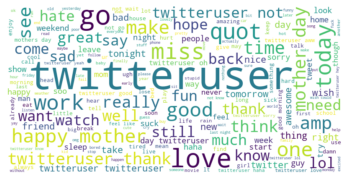


*************************************************
Word Cloud for class label =  0
There are total 428668 words in your vocab


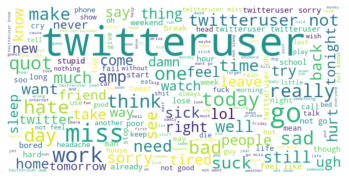


*************************************************
Word Cloud for class label =  1
There are total 510626 words in your vocab


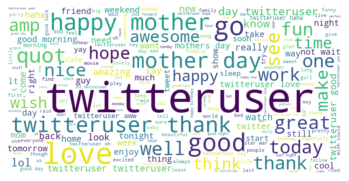

In [59]:
col = 'tweet_text'
label = 'sentiment'
word_cloud(df,col,label)